<a href="https://colab.research.google.com/github/kanri3/machine_learning/blob/main/logistic_regression_hands_on.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ロジスティック回帰

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 訓練データ生成

In [23]:
n_sample = 100
# harf_n_sample = 50
var = .2 # ばらつき標準偏差

def gen_data(n_sample):
    harf_n_sample = int(n_sample / 2)
    # 説明変数x1とx2
    # 50×2の行列を作成。要素の平均値は-1と+1
    X1_x2_upper = np.random.normal(size=n_sample).reshape(-1, 2) - 1.
    X1_x2_lower = np.random.normal(size=n_sample).reshape(-1, 2) + 1.
    # 上下に結合
    X1_x2 = np.concatenate([X1_x2_upper, X1_x2_lower])
    print("X1_x2:{}".format(X1_x2.shape))

    # 目的変数y ロジスティック回帰の目的変数は0 or 1
    y_ = np.concatenate([np.zeros(harf_n_sample), np.ones(harf_n_sample)]).astype(np.int)
    return X1_x2, y_

def plt_data(X1_x2, y_):
    x1_ = X1_x2[:, 0]
    x2_ = X1_x2[:, 1]
    plt.scatter(x1_, x2_, c=y_, facecolor="none", edgecolor="b", s=50, label="training data")
    plt.legend()

X1_x2:(100, 2)


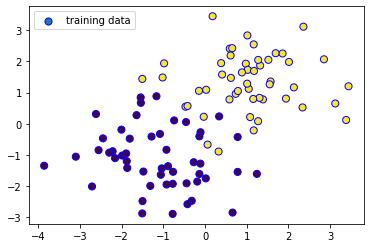

In [24]:
#データ作成
X1_x2, y_ = gen_data(n_sample)
#データ表示
plt_data(X1_x2, y_)

## 学習

In [25]:
# 引数の行列の左端に1だけの列を追加（定数項を出力）
def add_one(X):
    return np.concatenate([np.ones(len(X))[:, None], X], axis=1)

In [26]:
x=np.arange(100).reshape(10,10)
print(x)
# 1 / (1 + np.exp(-x))
1 / (1+x)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


array([[1.        , 0.5       , 0.33333333, 0.25      , 0.2       ,
        0.16666667, 0.14285714, 0.125     , 0.11111111, 0.1       ],
       [0.09090909, 0.08333333, 0.07692308, 0.07142857, 0.06666667,
        0.0625    , 0.05882353, 0.05555556, 0.05263158, 0.05      ],
       [0.04761905, 0.04545455, 0.04347826, 0.04166667, 0.04      ,
        0.03846154, 0.03703704, 0.03571429, 0.03448276, 0.03333333],
       [0.03225806, 0.03125   , 0.03030303, 0.02941176, 0.02857143,
        0.02777778, 0.02702703, 0.02631579, 0.02564103, 0.025     ],
       [0.02439024, 0.02380952, 0.02325581, 0.02272727, 0.02222222,
        0.02173913, 0.0212766 , 0.02083333, 0.02040816, 0.02      ],
       [0.01960784, 0.01923077, 0.01886792, 0.01851852, 0.01818182,
        0.01785714, 0.01754386, 0.01724138, 0.01694915, 0.01666667],
       [0.01639344, 0.01612903, 0.01587302, 0.015625  , 0.01538462,
        0.01515152, 0.01492537, 0.01470588, 0.01449275, 0.01428571],
       [0.01408451, 0.01388889, 0.0136986

In [27]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 確率的勾配降下法 stochastic gradient descent
def sgd(One_x1_x2, max_iter, eta):
    # .shape[1] shapeで行数，列数が出る所の…
    # 説明変数の係数ベクトル
    w_ = np.zeros(One_x1_x2.shape[1])
    for i in range(max_iter):
        w_prev_ = np.copy(w_) # ディープコピー
        sigma = sigmoid(One_x1_x2 @ w_)
        # sigma = sigmoid(np.dot(One_x1_x2, w_))
        grad = One_x1_x2.T @ (sigma - y_)
        # grad = np.dot(One_x1_x2.T, (sigma - y_))
        w_ -= eta * grad
        # 収束を判定
        if np.allclose(w_, w_prev_):
            return w_, i
    return w_, i

One_x1_x2 = add_one(X1_x2)
print("One_x1_x2:", One_x1_x2[0:5])
max_iter=100 # 繰り返し回数
eta = 0.01
w_, i = sgd(One_x1_x2, max_iter, eta)
print("w_, i", w_, ",", i)

One_x1_x2: [[ 1.         -1.03727966 -1.43254528]
 [ 1.         -3.09569154 -1.05630537]
 [ 1.         -1.07958457 -0.32530068]
 [ 1.         -0.44187957 -1.9117456 ]
 [ 1.         -1.50401296 -2.87777649]]
w_, i [-0.01274008  2.09568521  2.56352407] , 99


## 予測

In [28]:
# 等間隔にびっしり(x1, x2)座標を打ち、そのすべてをサンプルとしてモデルによる判定を行う。

X1_mesh, X2_mesh = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
X1_x2_mesh = np.array([X1_mesh, X2_mesh]).reshape(2, -1).T

print(X1_mesh)
print(X1_mesh.shape)
print(X2_mesh)
print(X2_mesh.shape)
print(X1_x2_mesh.T)
print(X1_x2_mesh.shape)

[[-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 ...
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]]
(100, 100)
[[-5.        -5.        -5.        ... -5.        -5.        -5.       ]
 [-4.8989899 -4.8989899 -4.8989899 ... -4.8989899 -4.8989899 -4.8989899]
 [-4.7979798 -4.7979798 -4.7979798 ... -4.7979798 -4.7979798 -4.7979798]
 ...
 [ 4.7979798  4.7979798  4.7979798 ...  4.7979798  4.7979798  4.7979798]
 [ 4.8989899  4.8989899  4.8989899 ...  4.8989899  4.8989899  4.8989899]
 [ 5.         5.         5.        ...  5.         5.         5.       ]]
(100, 100)
[[-5.        -4.8989899 -4.7979798 ...  4.7979798  4.8989899  5.       ]
 [-5.        -5. 

In [29]:
One_x1_x2_mesh = add_one(X1_x2_mesh)
prob_ = sigmoid(One_x1_x2_mesh @ w_)
print(prob_.shape)
print(prob_)
# proba = sigmoid(np.dot(One_x1_x2_mesh, w))
y_pred = (prob_ > 0.5).astype(np.int)
print(y_pred)

(10000,)
[7.53568325e-11 9.31228857e-11 1.15077446e-10 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
[0 0 0 ... 1 1 1]


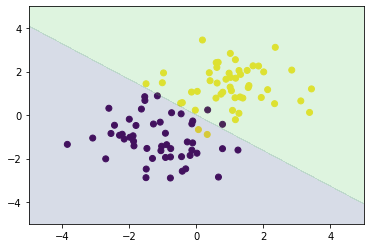

In [30]:
x1_ = X1_x2[:, 0]
x2_ = X1_x2[:, 1]
plt.scatter(x1_, x2_, c=y_)
# .linspace(0, 1, 3) yを0～1で3分割
plt.contourf(X1_mesh, X2_mesh, prob_.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))

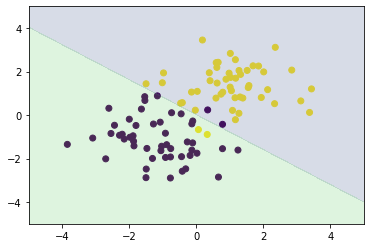

In [31]:
#sklearn実装

from sklearn.linear_model import LogisticRegression
model=LogisticRegression(fit_intercept=True)
model.fit(X1_x2, y_)
proba = model.predict_proba(X1_x2_mesh)
# y_pred = (proba > 0.5).astype(np.int)
x1_ = X1_x2[:, 0]
x2_ = X1_x2[:, 1]
plt.scatter(x1_, x2_, c=y_)
plt.contourf(X1_mesh, X2_mesh, proba[:, 0].reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
# plt.scatter(train[:, 0], train[:, 1], c=color_order)
# plt.contourf(xx0, xx1, proba[:, 0].reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))